In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, f1_score
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import pandas as pd
import os
train = pd.read_csv(os.path.join(os.getcwd().replace('model', ''), 'data/processed_train.csv') )
test = pd.read_csv(os.path.join(os.getcwd().replace('model', ''), 'data/processed_test.csv') )
train.info()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 100: invalid start byte

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
def model_eval(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'Accuracy Score is : {accuracy_score(y_test,y_pred)}')
    print(f'Classification_report')
    print(classification_report(y_test,y_pred))
    print(f'Confusion Matrix')
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

In [4]:
def model_train(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return f1_score(y_test, y_pred, average="weighted")

In [5]:
def tfidf_vectorizer():
    vec=TfidfVectorizer(max_features=10000)
    x_train=vec.fit_transform(train['text']).toarray()
    x_test=vec.transform(test['text']).toarray()
    y_train=train['sentiment']
    y_test=test['sentiment']
    return x_train, y_train, x_test, y_test

def bog_vectorizer():
    vec = CountVectorizer(max_features=10000)
    x_train = vec.fit_transform(train['text']).toarray()
    x_test = vec.transform(test['text']).toarray()
    y_train = train['sentiment']
    y_test = test['sentiment']
    return x_train, y_train, x_test, y_test

def binary_vectorizer():
    vec = CountVectorizer(binary=True, max_features=10000)
    x_train = vec.fit_transform(train['text']).toarray()
    x_test = vec.transform(test['text']).toarray()
    y_train = train['sentiment']
    y_test = test['sentiment']
    return x_train, y_train, x_test, y_test

In [ ]:

best_f1 = 0
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    f1 = model_train(knn)
    if f1 > best_f1:
        best_f1 = f1
        best_k = i
print(f"Best f1 score is {best_f1} with k={best_k}")


In [8]:
k=3
best_f1 = 0
metrics=['euclidean', 'manhattan', 'cosine']
weights=['uniform', 'distance']
for metric in metrics:
    for weight in weights:
        # TF-IDF Vectorization
        x_train, y_train, x_test, y_test = tfidf_vectorizer()
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights=weight)
        f1 = model_train(knn)
        if f1 > best_f1:
            best_f1 = f1
            best_k = k
            best_metric = metric
            best_weight = weight
            best_vectorization = 'TF-IDF'
        print(f"f1 score is {f1} with k={k}, metric={metric}, weight={weight}, vectorization=TF-IDF")
        # Bag of Words Vectorization    
        x_train, y_train, x_test, y_test = bog_vectorizer()
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights=weight)
        f1 = model_train(knn)
        if f1 > best_f1:
            best_f1 = f1
            best_k = k
            best_metric = metric
            best_weight = weight
            best_vectorization = 'Bag of Words'
        print(f"f1 score is {f1} with k={k}, metric={metric}, weight={weight}, vectorization=Bag of Words")
        # Binary Vectorization
        x_train, y_train, x_test, y_test = binary_vectorizer()
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights=weight)
        f1 = model_train(knn)
        if f1 > best_f1:
            best_f1 = f1
            best_k = k
            best_metric = metric
            best_weight = weight
            best_vectorization = 'Binary'
        print(f"f1 score is {f1} with k={k}, metric={metric}, weight={weight}, vectorization=Binary")

print(f"Best f1 score is {best_f1} with k={best_k}, metric={best_metric}, weight={best_weight}, vectorization={best_vectorization}")

f1 score is 0.41578503496874325 with k=3, metric=euclidean, weight=uniform, vectorization=TF-IDF
f1 score is 0.5180767000410418 with k=3, metric=euclidean, weight=uniform, vectorization=Bag of Words
f1 score is 0.5251776571289408 with k=3, metric=euclidean, weight=uniform, vectorization=Binary
f1 score is 0.415681237814423 with k=3, metric=euclidean, weight=distance, vectorization=TF-IDF
f1 score is 0.5218573251185644 with k=3, metric=euclidean, weight=distance, vectorization=Bag of Words
f1 score is 0.5303008761149888 with k=3, metric=euclidean, weight=distance, vectorization=Binary
f1 score is 0.40792886367451253 with k=3, metric=manhattan, weight=uniform, vectorization=TF-IDF
f1 score is 0.521109215981387 with k=3, metric=manhattan, weight=uniform, vectorization=Bag of Words
f1 score is 0.5251776571289408 with k=3, metric=manhattan, weight=uniform, vectorization=Binary
f1 score is 0.4029565406914716 with k=3, metric=manhattan, weight=distance, vectorization=TF-IDF
f1 score is 0.5272

Accuracy Score is : 0.5540464063384267
Classification_report
              precision    recall  f1-score   support

           0       0.52      0.53      0.52      1001
           1       0.53      0.61      0.57      1430
           2       0.64      0.50      0.56      1103

    accuracy                           0.55      3534
   macro avg       0.56      0.55      0.55      3534
weighted avg       0.56      0.55      0.55      3534

Confusion Matrix


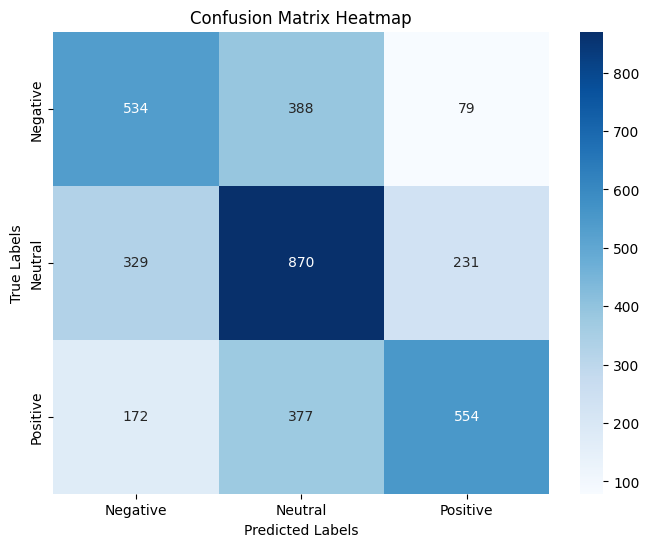

In [10]:
best_model = KNeighborsClassifier(n_neighbors=3, metric='cosine', weights='uniform')
x_train, y_train, x_test, y_test = tfidf_vectorizer()
model_eval(best_model)